<a href="https://colab.research.google.com/github/PatandyaW/Submition/blob/main/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data: Bike Sharing Dataset**


*   **Nama:** Patandya Wisnu Suraya
*   **Email:** m214b4ky3480@bangkit.academy
*   **Id Dicoding:** patandya_wisnu

# Menetukan Pertanyaan Bisnis


*   Apakah kondisi cuaca mempengaruhi banyaknya rental sepeda?
*   Bagaimana penyewaan sepeda dari waktu ke waktu dimulai dari januari hingga desember?
*   Apakah musim mempengaruhi penyewaan sepeda?
*   Bagaimana korelasi antara rental sepeda dengan faktor lingkungan berupa temperature, feeling temperature, kelembaban, dan windspeed (kecepatan arah angin)




## Menyiapkan Library Python yang Dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling
Gathering Data
Pada tahap ini mengumpulkan data yang telah dikumpulkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hr.csv

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/PatandyaW/Submition/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/PatandyaW/Submition/main/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Assessing Data
### **Menilai hour_df dan day_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Pada tabel day_df dan hour_df terdapat 0 data yang double, artinya semua data bersifat unik.

### Cleaning Data
Tidak ada data yang perlu dibersihkan

### Exploratory Data Analysis (EDA)

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Didata day_df didapati bahwa tidak ada nilai/data yang kosong

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita lihat pada data day_df diatas, tidak ada keanehan pada nilai statistiknya.

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dapat kita lihat pada data hour_df diatas, tidak ada keanehan pada nilai statistiknya.

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Didata hour_df didapati bahwa tidak ada nilai/data yang kosong

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

Mengubah nilai dteday dari objective menjadi datetime

In [ ]:
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Severe Weather'})

day_df['mnth'] = day_df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December' })

day_df['weekday'] = day_df['weekday'].map({ 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['yr'] = day_df['yr'].map({0: 2011, 1:2012})


Mengubah angka menjadi keterangan agar jelas dalam memahami data

In [ ]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,January,0,Thursday,1,Clear/Partly Cloudy,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,January,0,Friday,1,Misty/Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,January,0,Sunday,0,Clear/Partly Cloudy,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengambil 10 data untuk memastikan apakah sudah sesuai format yang diinginkan

1. **Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan cuaca**

In [ ]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

2. **Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan cuaca**

In [ ]:
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
            max   min         mean     sum
mnth                                      
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

### Visualisasi Data

### Apakah kondisi cuaca mempengaruhi banyaknya rental sepeda?


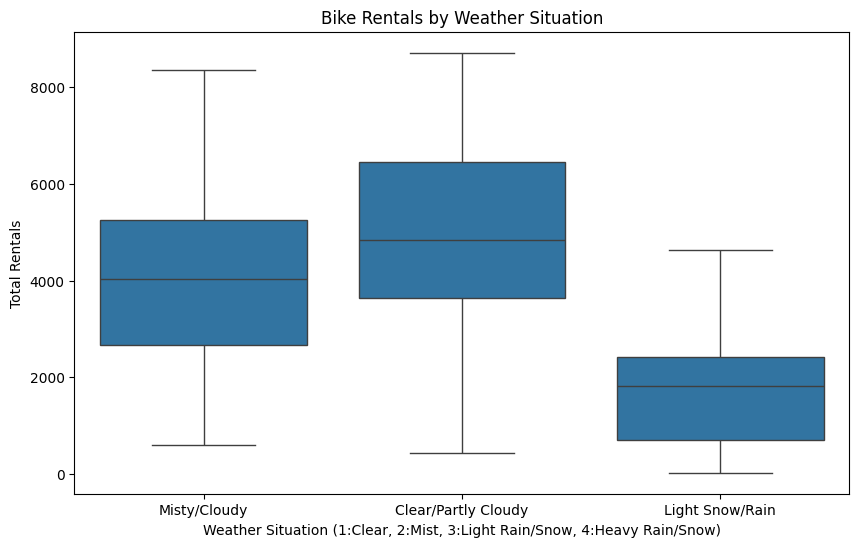

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation (1:Clear, 2:Mist, 3:Light Rain/Snow, 4:Heavy Rain/Snow)')
plt.ylabel('Total Rentals')
plt.show()

Penyewaan sepeda lebih sering dilakukan ketika cuaca cerah/mendung dibandingkan cuaca hujan dan berkabut

###Bagaimana penyewaan sepeda dari waktu ke waktu dimulai dari januari hingga desember?

<ipython-input-134-da903639c7e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-134-da903639c7e5>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


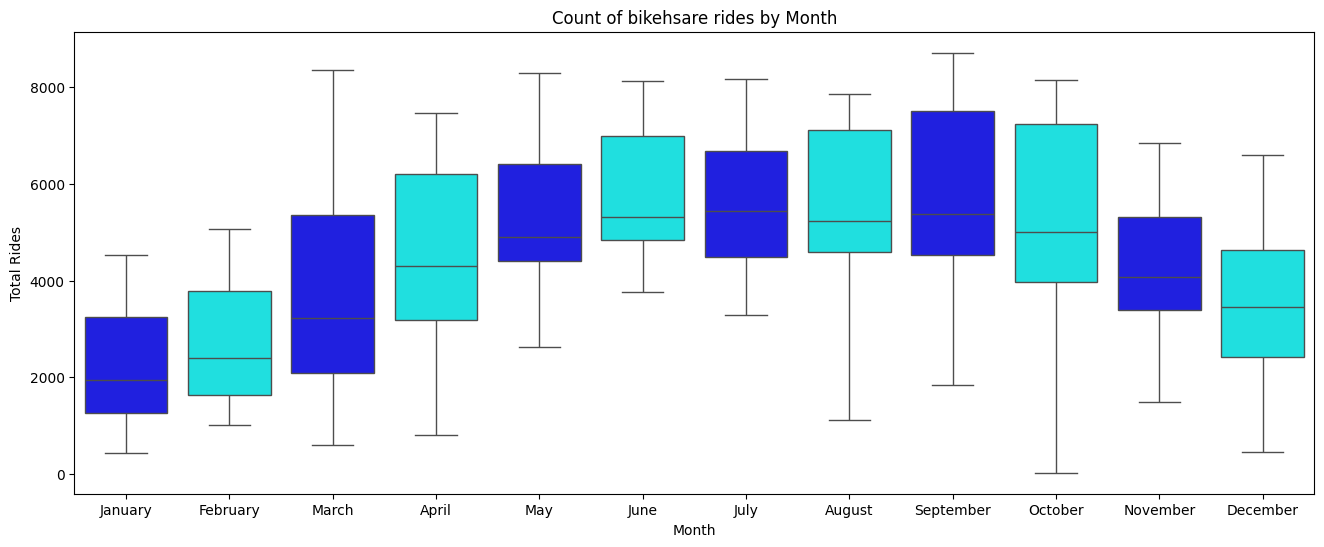

In [ ]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="mnth",
    y="cnt",
    data=day_df,
    palette=["blue", "cyan"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")

# Show the plot
plt.show()

Dari data ini bisa dilihat bahwa diawal dan akhir bulan terdapat turunnya rental sepeda

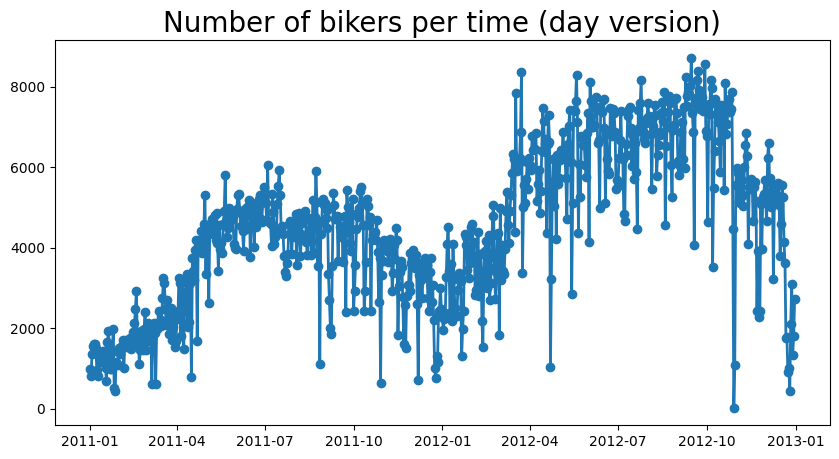

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    day_df["dteday"],
    day_df["cnt"],
    marker='o',
    linewidth=2,
)
plt.title("Number of bikers per time (day version)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Divisualisasi diatas didapati bahwa rental sepeda lebih diminati pada pertengahan tahun dan mengalami penurunan diawal dan akhir tahun

### Apakah musim mempengaruhi penyewaan sepeda?

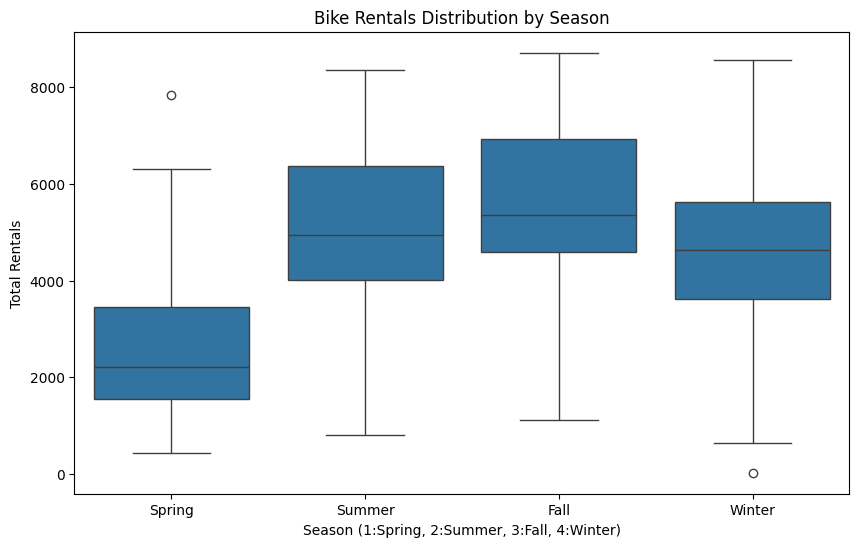

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Bike Rentals Distribution by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Total Rentals')
plt.show()

Dari visualisasi musim diatas, didapati bahwa rental sepeda cenderung banyak diminati pada musim gugur

### Bagaimana korelasi antara rental sepeda dengan faktor lingkungan berupa temperature, feeling temperature, kelembaban, dan windspeed (kecepatan arah angin) ?


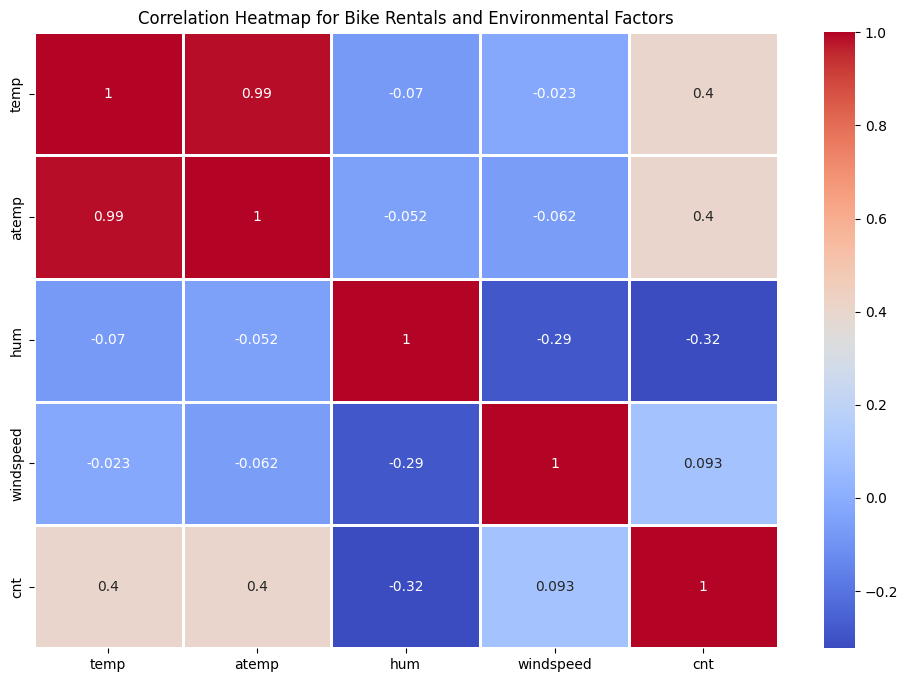

In [ ]:
plt.figure(figsize=(12,8))
correlation = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap for Bike Rentals and Environmental Factors')
plt.show()

Temperature, feeling temperature, humidity, windspeed yang dihasilkan heatmap berdasarkan cnt (bike rental counts) tidak memiliki lebih dari 0.5 korelasi. akan tetapi di temperature dan feeling temperature jauh lebih tinggi korelasinya dibandingkan variabel lain


### Analisis Lanjutan

In [ ]:
# Group by registered users and calculate RFM metrics
df_rfm = hour_df.groupby('registered').agg({
    'dteday': lambda x: (hour_df['dteday'].max() - x.max()).days,  # Recency
    'registered': 'count',  # Frequency
    'cnt': 'sum'  # Monetary: total bike rentals by registered users
})

# Rename the columns to match RFM terminology
df_rfm.columns = [ 'recency', 'frequency', 'monetary']
rfm_segmentation = df_rfm.copy()
rfm_segmentation['R'] = rfm_segmentation['recency'].apply(r_score, args=('recency', quantiles))
rfm_segmentation['F'] = rfm_segmentation['frequency'].apply(fm_score, args=('frequency', quantiles))
rfm_segmentation['M'] = rfm_segmentation['monetary'].apply(fm_score, args=('monetary', quantiles))


rfm_segmentation['RFM Score'] = rfm_segmentation['R'].map(str) + rfm_segmentation['F'].map(str) + rfm_segmentation['M'].map(str)

print(rfm_segmentation)

            recency  frequency  monetary  R  F  M RFM Score
registered                                                 
0              17.0         24        35  4  4  1       441
1              15.0        201       294  4  4  3       443
2              19.0        245       648  4  4  4       444
3              14.0        294      1154  4  4  4       444
4             106.0        307      1602  4  4  4       444
...             ...        ...       ... .. .. ..       ...
860             NaN          1       967  1  1  4       114
871             NaN          1       938  1  1  4       114
876             NaN          2      1916  1  4  4       144
885             NaN          1       976  1  1  4       114
886             NaN          1       977  1  1  4       114

[776 rows x 7 columns]


**Berikut penjelasan setiap kolom spesifik dalam tabel:**

*  **Recency (R):** Mengukur seberapa baru seorang pengguna menyewa sepeda. Nilai yang lebih kecil menunjukkan aktivitas yang lebih baru, sedangkan nilai yang lebih besar menunjukkan bahwa pengguna tidak menyewa sepeda untuk waktu yang lama.
Contoh: registered=0 memiliki recency sebesar 17, artinya pengguna ini terakhir menyewa sepeda 17 hari yang lalu.
*  **Frequency (F):** Mengukur seberapa sering pengguna menyewa sepeda. Nilai frekuensi yang lebih tinggi menunjukkan penggunaan layanan sepeda yang lebih sering.
Contoh: registered=2 memiliki frekuensi 245, menunjukkan pengguna ini menyewa sepeda sebanyak 245 kali.
*  **Monetary (M):** Dalam konteks ini, monetary mengacu pada jumlah total penyewaan sepeda. Kolom ini biasanya digunakan untuk mengukur seberapa banyak seorang pengguna "mengeluarkan" atau seberapa besar nilai yang mereka dapatkan dari layanan.
Contoh: registered=4 memiliki monetary sebesar 1602, artinya pengguna ini menyewa sepeda sebanyak 1602 kali selama periode waktu tersebut.

In [ ]:
print(df_rfm.columns)

Index(['recency', 'frequency', 'monetary'], dtype='object')


### **Kesimpulan Berdasarkan Analisis Data Penyewaan Sepeda**


**1.   Pengaruh Cuaca Terhadap Penyewaan Sepeda:**

* Berdasarkan hasil analisis, dapat disimpulkan bahwa penyewaan sepeda cenderung meningkat pada saat cuaca cerah atau mendung, sementara sangat sedikit penyewaan terjadi saat salju turun, dan tidak ada penyewaan saat cuaca sangat buruk.
* Dengan demikian, penyewaan sepeda lebih sering dilakukan saat kondisi cuaca yang mendukung, seperti cuaca cerah atau mendung, dibandingkan dengan kondisi hujan dan berkabut.

**2. Pola Penyewaan Sepeda Berdasarkan Bulan:**
* Dari analisis bulanan, dapat disimpulkan bahwa bulan Juni mencatat rata-rata dan jumlah penyewaan sepeda tertinggi, sedangkan bulan Januari memiliki rata-rata dan jumlah penyewaan terendah.
* Hal ini menunjukkan bahwa cuaca hangat di pertengahan tahun, khususnya pada bulan Juni, cenderung meningkatkan aktivitas penyewaan sepeda, sedangkan cuaca dingin di awal tahun mengurangi minat pengguna.
* Berdasarkan pola data, penyewaan sepeda mengalami penurunan di awal dan akhir bulan.
* Puncak penyewaan terjadi di pertengahan tahun, sementara penurunan yang signifikan terjadi di awal dan akhir tahun.


**3. Pengaruh Musim Terhadap Penyewaan Sepeda:**
* Dari visualisasi musim, dapat disimpulkan bahwa musim gugur merupakan musim yang paling diminati untuk penyewaan sepeda, dengan jumlah penyewaan yang lebih tinggi dibandingkan musim lainnya.
* Hal ini menunjukkan adanya preferensi pengguna untuk menyewa sepeda pada cuaca yang lebih sejuk, mungkin karena suhu yang nyaman di musim gugur.

**4. Korelasi Antara Penyewaan Sepeda dan Faktor Lingkungan:**
* Berdasarkan heatmap yang dihasilkan, faktor suhu (temperature) dan suhu yang dirasakan (feeling temperature) menunjukkan korelasi yang lebih tinggi dengan jumlah penyewaan sepeda dibandingkan faktor kelembaban (humidity) dan kecepatan angin (windspeed). Namun, korelasi ini masih di bawah 0.5, yang menunjukkan hubungan yang lemah.

**5. Analisis RFM (Recency, Frequency, Monetary):**
* **Recency (R):** Pengguna yang baru-baru ini menyewa sepeda cenderung memiliki nilai recency yang rendah. Sebaliknya, pengguna yang sudah lama tidak menyewa sepeda memiliki nilai recency yang lebih tinggi. Pengguna dengan nilai recency rendah lebih cenderung menjadi target retensi.
* **Frequency (F):** Pengguna dengan frekuensi tinggi menunjukkan tingkat keterlibatan yang lebih besar dalam menggunakan layanan bike-sharing. Semakin sering pengguna menyewa sepeda, semakin besar nilai frekuensi mereka.
* **Monetary (M):** Pengguna dengan monetary tinggi menunjukkan total penyewaan yang lebih besar. Ini mencerminkan seberapa besar nilai layanan bagi pengguna, baik dalam jangka panjang maupun penggunaan harian.
